<a href="https://colab.research.google.com/github/smkmohsin/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Sheikh_Mohsin_Kader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. 
# <b>Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors. 

# <b><u> Data Description </u></b>
###Demographic: 

• **Sex**: male or female("M" or "F") 

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
###Behavioral 
• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO") 

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

###Medical( history) 
• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal) 

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal) 

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal) 

• **Diabetes**: whether or not the patient had diabetes (Nominal) 

###Medical(current) 
• **Tot Chol**: total cholesterol level (Continuous) 

• **Sys BP**: systolic blood pressure (Continuous) 

• **Dia BP**: diastolic blood pressure (Continuous) 

• **BMI**: Body Mass Index (Continuous) 

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• **Glucose**: glucose level (Continuous) 

###Predict variable (desired target) 
• **CHD**: 10-year risk of coronary heart disease (binary: “1”, means “Yes”, “0” means “No”) - DV

# <b>Importing Libaries 

In [331]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [332]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [333]:
# Importing Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project 2/data_cardiovascular_risk.csv')

# <b> Data Inspection

In [334]:
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [335]:
dataset.shape

(3390, 17)

In [336]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [337]:
dataset.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [338]:
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# <b> Data Cleansing

> ## Removing unnecessary Column

'id' & 'education' column will not help predicting coronary heart disease

In [339]:
dataset.drop(['id', 'education'], inplace=True, axis=1)

In [340]:
dataset.shape

(3390, 15)

> ## Handling Missing Data


From the entry totals above, many of the features are missing a significant amount of data. Explore these columns further to determine the best approach for each.

In [341]:
# Missing Value Count Function
def show_missing():
    missing = dataset.columns[dataset.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(dataset[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(dataset[show_missing()].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing Data Count
glucose       304
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [342]:
print(len(dataset[dataset['cigsPerDay'].isna()][['is_smoking','cigsPerDay']]))

22


>### Feature Glucose

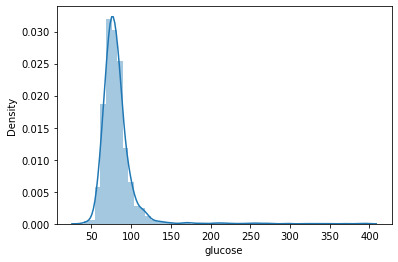

In [343]:
sns.distplot(dataset['glucose'].dropna())

#### Positively Skewed - So we will impute it with Median

In [344]:
dataset['glucose'] = dataset['glucose'].fillna(dataset['glucose'].median())
print('Glucose value missing after filling with median:', dataset['glucose'].isnull().sum())

Glucose value missing after filling with median: 0


>### Feature BPMeds, totChol, cigsPerDay, BMI, heartRate

As missing data is less than 2% so well drop the rows with missing value

In [345]:
dataset.dropna(axis=0, inplace=True)

In [346]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3272 non-null   int64  
 1   sex              3272 non-null   object 
 2   is_smoking       3272 non-null   object 
 3   cigsPerDay       3272 non-null   float64
 4   BPMeds           3272 non-null   float64
 5   prevalentStroke  3272 non-null   int64  
 6   prevalentHyp     3272 non-null   int64  
 7   diabetes         3272 non-null   int64  
 8   totChol          3272 non-null   float64
 9   sysBP            3272 non-null   float64
 10  diaBP            3272 non-null   float64
 11  BMI              3272 non-null   float64
 12  heartRate        3272 non-null   float64
 13  glucose          3272 non-null   float64
 14  TenYearCHD       3272 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 409.0+ KB


In [347]:
dataset.shape

(3272, 15)

In [348]:
dataset.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


## **Handling Outliers**

In [349]:
# find categorical variables
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [350]:
# find Numerical variables
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 13 numerical variables


In [351]:
discrete = []
for var in numerical:
    if len(dataset[var].unique())<20:
        print(var, ' values: ', dataset[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [1 0]
diabetes  values:  [0 1]
TenYearCHD  values:  [0 1]
There are 5 discrete variables


In [352]:
continuous = [var for var in numerical if var not in discrete and var not in ['TenYearCHD']]

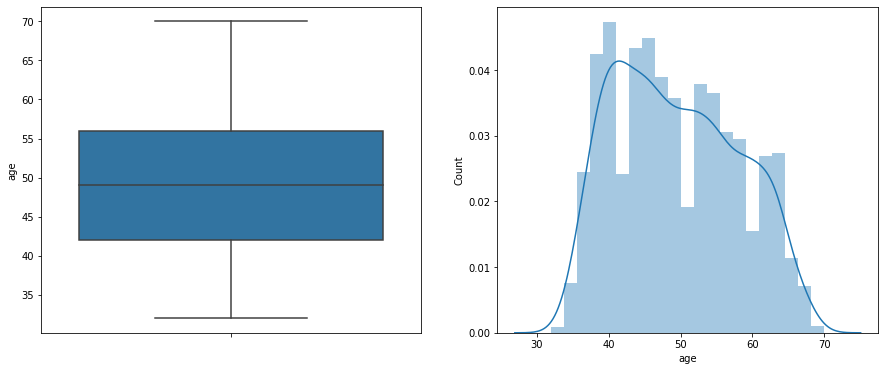

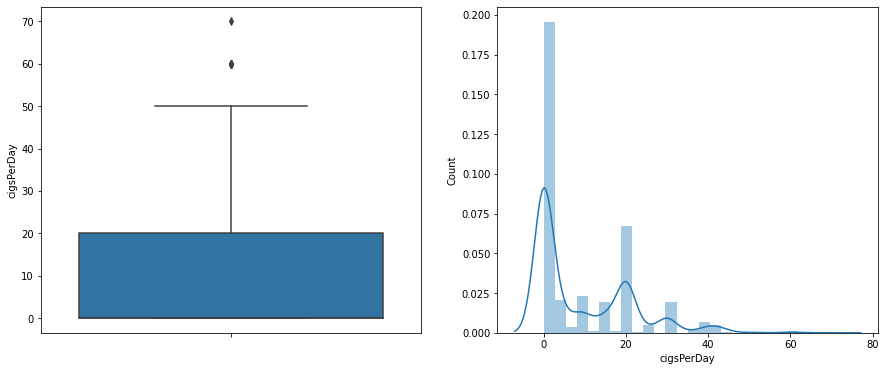

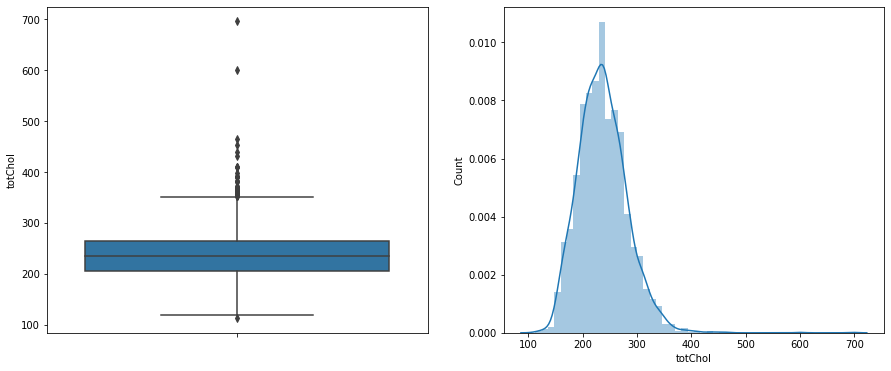

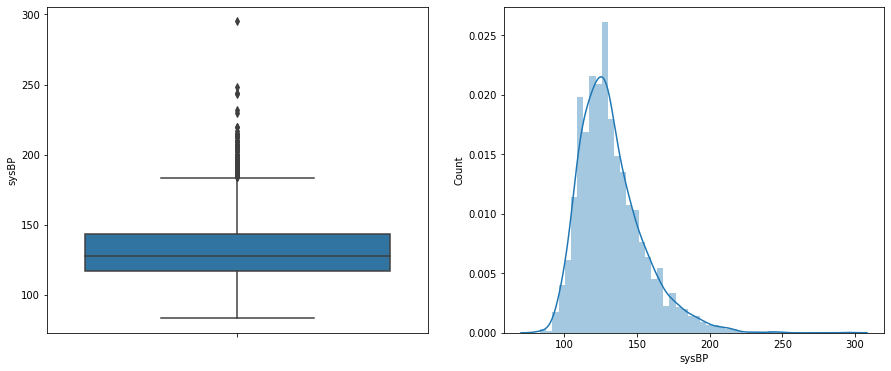

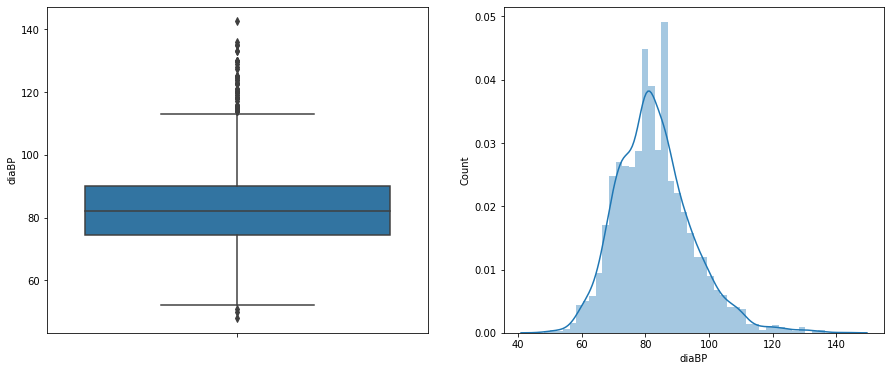

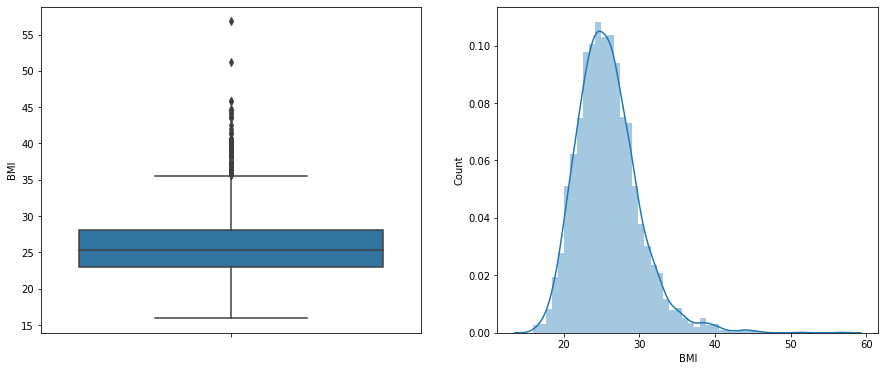

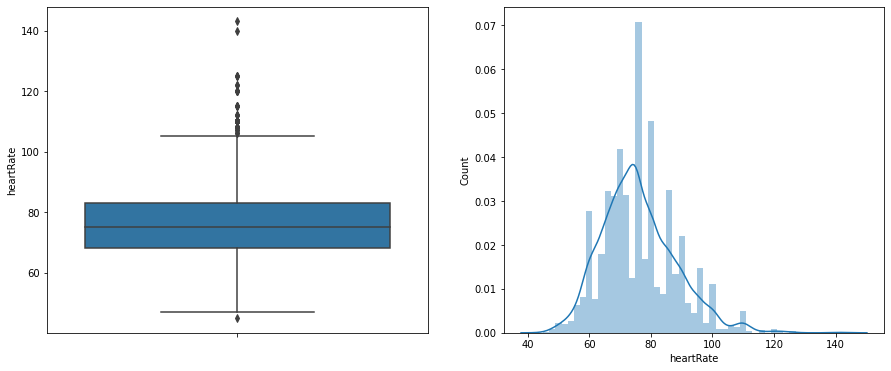

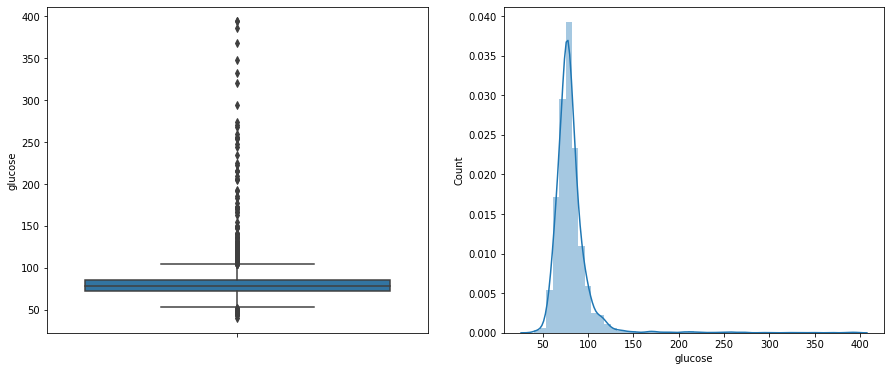

In [353]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=dataset[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(dataset[var].dropna())
    fig.set_ylabel('Count')
    fig.set_xlabel(var)

    plt.show()

There are outlier but these outliers will help us to predict CHD

In [354]:
dataset.shape

(3272, 15)

## **Feature Encoding**

In [355]:
# Encode Categorical Variables - one hot encoding
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
one_hot_sex = onehotencoder.fit_transform(np.array(dataset['sex']).reshape(-1,1)).toarray() 

In [356]:
one_hot_sex

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [357]:
np.sum(one_hot_sex,axis=0)

array([1837., 1435.])

In [358]:
dataset['sex'].value_counts()

F    1837
M    1435
Name: sex, dtype: int64

In [359]:
one_hot_df = pd.DataFrame(one_hot_sex,columns=['M', 'F'])
one_hot_df.head() 

,M,F
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [360]:
dataset = pd.concat([dataset,one_hot_df],axis=1)

In [361]:
# Drop sex column
dataset.drop('sex', axis=1, inplace=True)

In [362]:
dataset.head()

,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,M,F
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,36.0,NO,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0,1.0,0.0
2,46.0,YES,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0,0.0,1.0
3,50.0,YES,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0,1.0,0.0
4,64.0,YES,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0,1.0,0.0


In [363]:
# Encode Categorical Variables
dataset['is_smoking'] = dataset['is_smoking'].map({'NO':0,'YES':1})

In [364]:
dataset.head()

,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,M,F
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1,36.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0,1.0,0.0
2,46.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0,0.0,1.0
3,50.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0,1.0,0.0
4,64.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0,1.0,0.0


In [365]:
dataset.shape

(3384, 16)

In [366]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3384 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3272 non-null   float64
 1   is_smoking       3272 non-null   float64
 2   cigsPerDay       3272 non-null   float64
 3   BPMeds           3272 non-null   float64
 4   prevalentStroke  3272 non-null   float64
 5   prevalentHyp     3272 non-null   float64
 6   diabetes         3272 non-null   float64
 7   totChol          3272 non-null   float64
 8   sysBP            3272 non-null   float64
 9   diaBP            3272 non-null   float64
 10  BMI              3272 non-null   float64
 11  heartRate        3272 non-null   float64
 12  glucose          3272 non-null   float64
 13  TenYearCHD       3272 non-null   float64
 14  M                3272 non-null   float64
 15  F                3272 non-null   float64
dtypes: float64(16)
memory usage: 449.4 KB
